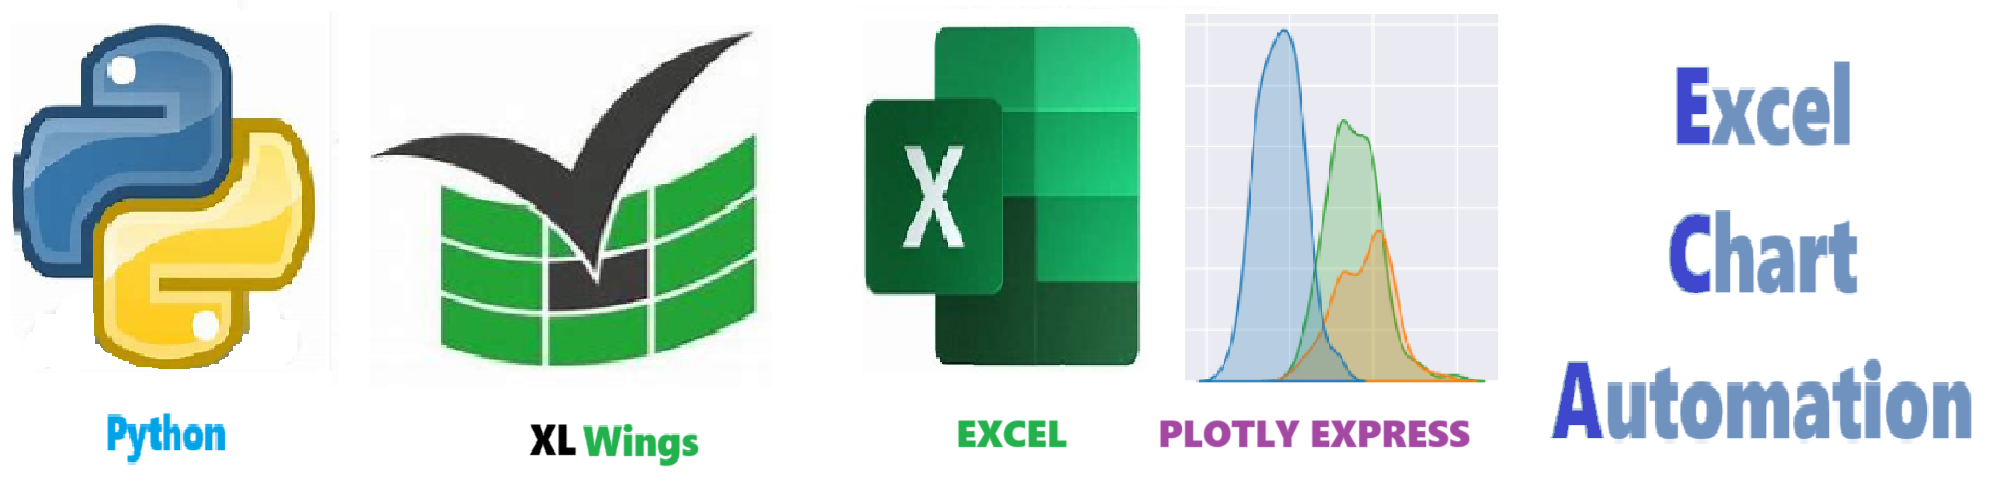

# Inspired by Written by Sven @ Coding is FUN !!!

How to easily insert Python charts into Excel and generate professional data visualizations for your work.<br>
With `xlwings`, you can run python code in excel without any difficulty at all.<br><br>
**Check out the `xlwings` documentation here: https://docs.xlwings.org/en/stable/matplotlib.html#**

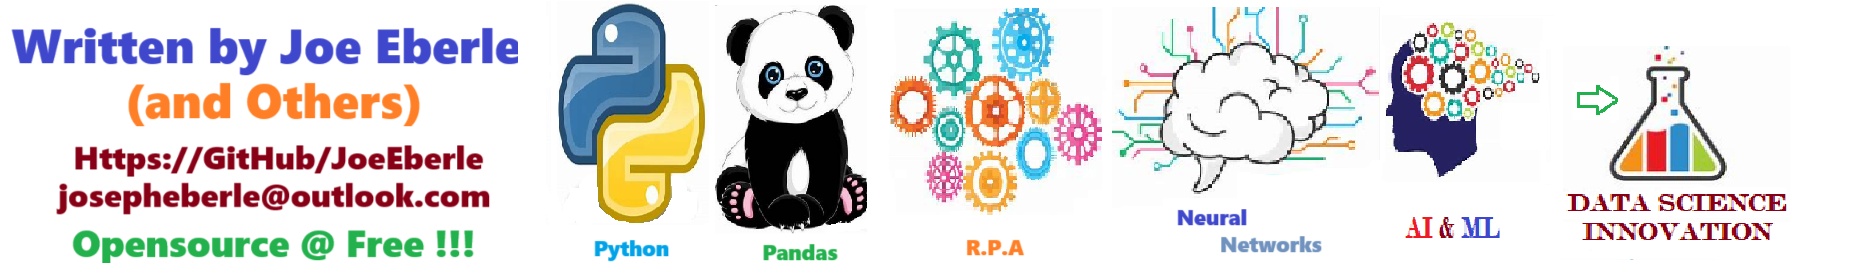

---

## Import/Install Dependencies & Load Dataset

In [1]:
first_install = False
if first_install:
    ! pip install xlwings --upgrade
    ! pip install kaleido psutil requests
    ! pip install mplfinance
    ! pip install yfinance    

In [2]:
import xlwings as xw  # pip install xlwings --upgrade
import pandas as pd  # pip install pandas

## Open a new spreadsheet and Make some cool charts 

In [3]:
# Create an empty workbook & rename sheet
wb = xw.Book()
sht = wb.sheets[0]
sht.name = "Python Charts"

In [4]:
# Helper function to insert 'Headings' into Excel cells
def insert_heading(rng, text):
    rng.value = text
    rng.font.bold = True
    rng.font.size = 24
    rng.font.color = (0, 0, 139)

In [5]:
# Load seaborn 'tips' dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

## Matplotlib Chart

In [6]:
insert_heading(sht.range("A2"), "Matplotlib Chart")

**Generate Chart**

Text(0.5, 1.0, 'Total Bill Amount By Day')

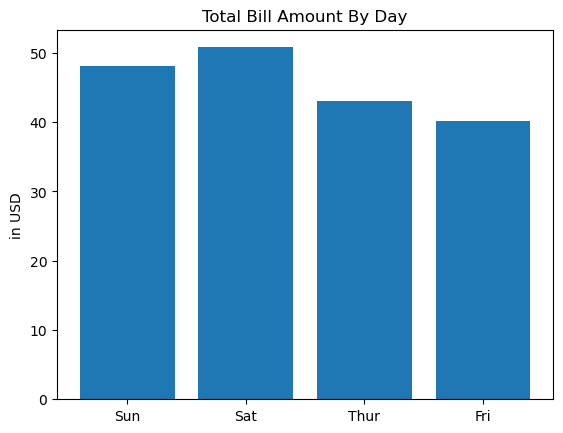

In [7]:
import matplotlib.pyplot as plt  # pip install matplotlib

fig = plt.figure()
x = df["day"]
y = df["total_bill"]
plt.bar(x, y)
plt.grid(False)
plt.ylabel("in USD")
plt.title("Total Bill Amount By Day")

**Insert Chart Into Excel**

In [8]:
sht.pictures.add(
    fig,
    name="Matplotlib",
    update=True,
    left=sht.range("A4").left,
    top=sht.range("A4").top,
    height=200,
    width=300,
)

<Picture 'Matplotlib' in <Sheet [Book4]Python Charts>>

## Pandas Chart

In [9]:
insert_heading(sht.range("A19"), "Pandas Chart")

**Generate Chart**

C:\Users\josep\AppData\Local\Temp\ipykernel_41008\330036376.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(by="day", as_index=False).sum()


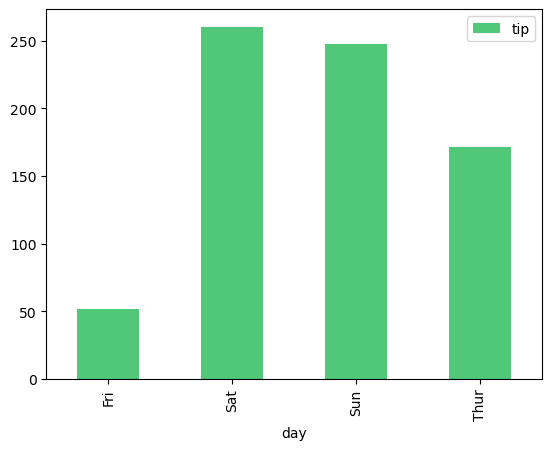

In [10]:
df_grouped = df.groupby(by="day", as_index=False).sum()
ax = df_grouped.plot(kind="bar", x="day", y="tip", color="#50C878", grid=False)

**Insert Chart Into Excel**

In [11]:
fig = ax.get_figure()
sht.pictures.add(
    fig,
    name="Pandas",
    update=True,
    left=sht.range("A21").left,
    top=sht.range("A21").top,
    height=200,
    width=300,
)

<Picture 'Pandas' in <Sheet [Book4]Python Charts>>

## Seaborn Chart

In [12]:
insert_heading(sht.range("A35"), "Seaborn Chart")

**Generate Chart**

C:\Users\josep\AppData\Local\Temp\ipykernel_41008\381866817.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="day", y="total_bill", hue="sex", ci=None)


<AxesSubplot: xlabel='day', ylabel='total_bill'>

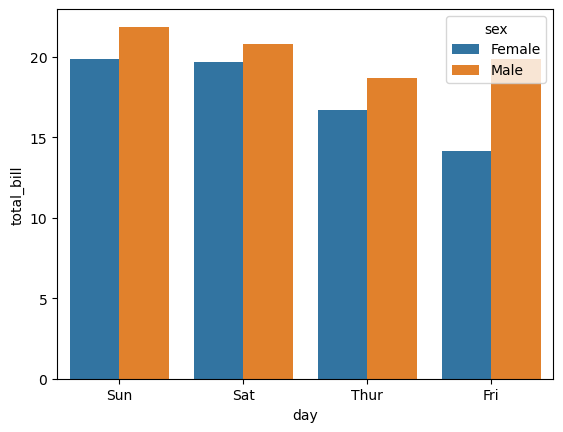

In [13]:
import seaborn as sns  # pip install seaborn

fig = plt.figure()
sns.set_style({'axes.grid' : False})
sns.barplot(data=df, x="day", y="total_bill", hue="sex", ci=None)

**Insert Chart Into Excel**

In [14]:
sht.pictures.add(
    fig,
    name="Seaborn1",
    update=True,
    left=sht.range("A37").left,
    top=sht.range("A37").top,
    height=200,
    width=300,
)

<Picture 'Seaborn1' in <Sheet [Book4]Python Charts>>

**Generate Chart**

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

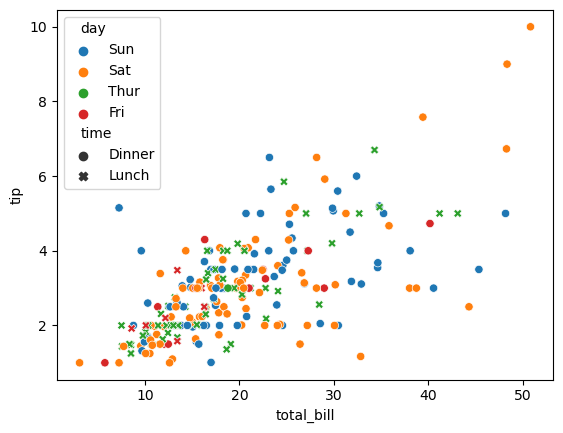

In [15]:
fig = plt.figure()
sns.scatterplot(data=df, x="total_bill", y="tip", hue="day", style="time")

**Insert Chart Into Excel**

In [16]:
sht.pictures.add(
    fig,
    name="Seaborn2",
    update=True,
    left=sht.range("A51").left,
    top=sht.range("A51").top,
    height=200,
    width=300,
)

<Picture 'Seaborn2' in <Sheet [Book4]Python Charts>>

### Not all Seaborn Charts seems to be supported 😯

<div class="alert alert-block alert-danger">
<b>NOTE:</b> Not all seaborn charts seems to be supported by xlwings. For instance, I had issues inserting a seaborn 'pairplot' into Excel.
</div>

## Plotly Chart

<div class="alert alert-block alert-info">
<b>🔥 Plotly Charts 🔥</b><br>
Since v0.24.0 (Jun 25, 2021), support for Plotly images was moved from xlwings PRO to the Open Source version. 🎉<br><br>
In addition to plotly, you will need <span style="color:red">kaleido, psutil</span>, and <span style="color:red">requests</span>. The easiest way to get it is via pip:
</div>

<p style="background:black">
<code style="background:black;color:white">C:\Users\YOUR_USERNAME> pip install kaleido psutil requests
</code>
</p>

In [17]:
insert_heading(sht.range("A66"), "Plotly Chart")

**Generate Chart**

In [18]:
import plotly.express as px  # pip install plotly-express

fig = px.histogram(df, x="day", y="total_bill", color="sex")
fig

**Insert Chart Into Excel**

In [19]:
sht.pictures.add(
    fig,
    name="Plotly1",
    update=True,
    left=sht.range("A68").left,
    top=sht.range("A68").top,
    height=200,
    width=300,
)

<Picture 'Plotly1' in <Sheet [Book4]Python Charts>>

**Generate Chart**

In [20]:
fig = px.histogram(
    df,
    x="day",
    y="total_bill",
    color="sex",
    title="Receipts by Payer Gender and Day of Week vs Target",
    labels={"sex": "Payer Gender", "day": "Day of Week", "total_bill": "Receipts"},
    category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "sex": ["Male", "Female"]},
    color_discrete_map={"Male": "RebeccaPurple", "Female": "MediumPurple"},
    template="simple_white",
)

fig.update_yaxes(tickprefix="$", showgrid=True)  # the y-axis is in dollars

fig.update_layout(  # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    ),
)

fig.add_shape(  # add a horizontal "target" line
    type="line",
    line_color="salmon",
    line_width=3,
    opacity=1,
    line_dash="dot",
    x0=0,
    x1=1,
    xref="paper",
    y0=950,
    y1=950,
    yref="y",
)

fig.add_annotation(  # add a text callout with arrow
    text="below target!", x="Fri", y=400, arrowhead=1, showarrow=True
)

**Insert Chart Into Excel**

In [21]:
sht.pictures.add(
    fig,
    name="Plotly2",
    update=True,
    left=sht.range("A83").left,
    top=sht.range("A83").top,
    height=200,
    width=300,
)

<Picture 'Plotly2' in <Sheet [Book4]Python Charts>>

## Insert Images (Chart)

In [22]:
insert_heading(sht.range("A99"), "Insert Images (Charts)")

**Generate Image (Chart)**

In [24]:
from pathlib import Path
import mplfinance as mpf  # pip install mplfinance
import yfinance as yf  # pip install yfinance

# Create output directory
OUTPUT_DIR = Path.cwd() / 'Output'
OUTPUT_DIR.mkdir(exist_ok=True)

# Get stock data
ticker = "TSLA"
start = "2021-07-01"
end = "2021-07-30"
data = yf.download(ticker, start=start, end=end)

# Create candle stick chart & save to output dir
output_img = OUTPUT_DIR / "mplfiance_candle.png"
fig = mpf.plot(
    data,
    type="candle",
    volume=True,
    style="yahoo",
    axtitle=f"{ticker}",
    savefig=output_img,
)

[*********************100%***********************]  1 of 1 completed


**Insert Chart Into Excel**

In [25]:
sht.pictures.add(
    output_img,
    name="mplfinance_candle",
    update=True,
    left=sht.range("A100").left,
    top=sht.range("A100").top,
    height=200,
    width=300,
)

<Picture 'mplfinance_candle' in <Sheet [Book4]Python Charts>>

**Generate Image (Chart)**

In [26]:
# Create line chart & save to output dir
output_img = OUTPUT_DIR / "mplfiance_line.png"
fig = mpf.plot(
    data, type="line", style="yahoo", axtitle=f"{ticker}", savefig=output_img
)

**Insert Chart Into Excel**

In [27]:
sht.pictures.add(
    output_img,
    name="mplfinance_line",
    update=True,
    left=sht.range("A115").left,
    top=sht.range("A115").top,
    height=200,
    width=300,
)

<Picture 'mplfinance_line' in <Sheet [Book4]Python Charts>>

## Save & Close Workbook

In [28]:
wb.save(OUTPUT_DIR / "PythonCharts.xlsx")
if len(wb.app.books) == 1:
    wb.app.quit()
else:
    wb.close()

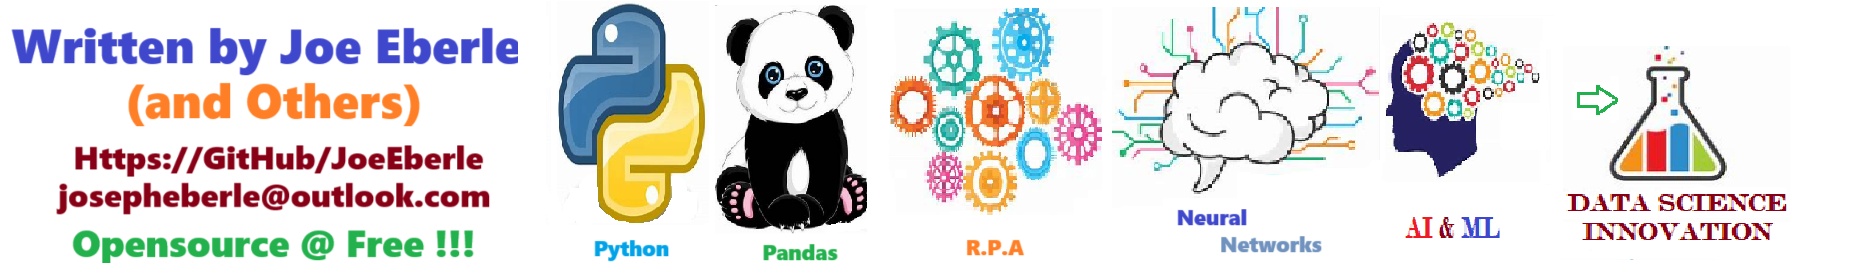

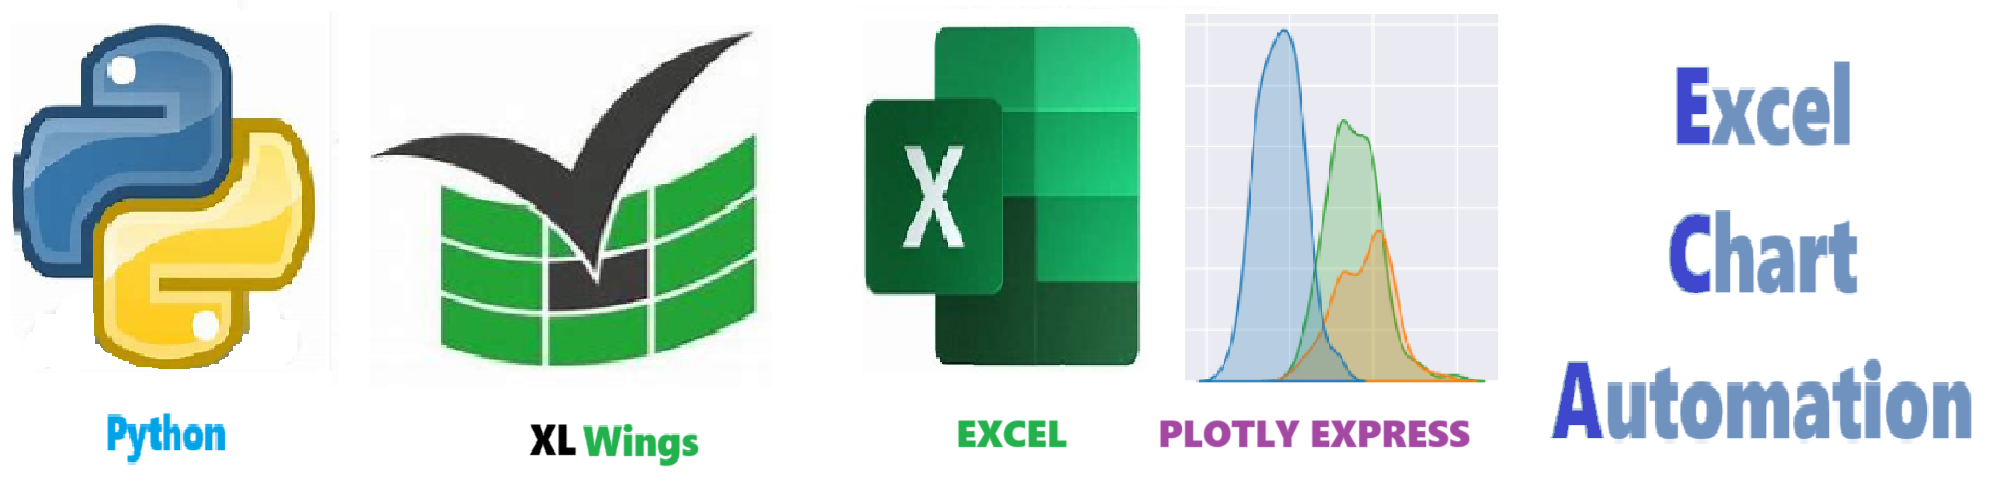